In [41]:
# %load_ext tensorboard
# %tensorboard --logdir C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Metrics/CCT --port=6009

In [42]:
# %reload_ext tensorboard
# %tensorboard --logdir C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Metrics/PIXMATCH/GTA5ToCityscape_Velho

Preparando bibliotecas

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Treino CCT

In [44]:
labelCB_tre_s = "CCT: CityScapes para CityScapesBrazil (Label - Treino)"
labelCB_val_s = "CCT: CityScapes para CityScapesBrazil (Label - Validação)"
labelGC_tre_s = "CCT: GTA5 para CityScapes (Label - Treino)"
labelGC_val_s = "CCT: GTA5 para CityScapes (Label - Validação)"
labelGB_tre_s = "CCT: GTA5 para CityScapesBrazil (Label - Treino)"
labelGB_val_s = "CCT: GTA5 para CityScapesBrazil (Label - Validação)"
labelCB_tre_t = "CCT: CityScapes para CityScapesBrazil (Unlabel - Treino)"
labelCB_val_t = "CCT: CityScapes para CityScapesBrazil (Unlabel - Validação)"
labelGC_tre_t = "CCT: GTA5 para CityScapes (Unlabel - Treino)"
labelGC_val_t = "CCT: GTA5 para CityScapes (Unlabel - Validação)"
labelGB_tre_t = "CCT: GTA5 para CityScapesBrazil (Unlabel - Treino)"
labelGB_val_t = "CCT: GTA5 para CityScapesBrazil (Unlabel - Validação)"

### FWIOU, MIOU, MPA, PA, LOSS

In [45]:
def plot_metric(data1, data2,data3, data4, label1, label2,label3, label4, eixox, eixoy):
    # Criar a figura e os eixos
    fig, ax = plt.subplots()

    # Plotar o primeiro conjunto de dados
    ax.plot(data1['Step'], data1['Value'], color='b', label=label1)

    if data2 is not  None:
    # Plotar o segundo conjunto de dados no mesmo eixo Y
        ax.plot(data2['Step'], data2['Value'], color='b', label=label2, linestyle='--')

    # Plotar o primeiro conjunto de dados
    ax.plot(data3['Step'], data3['Value'], color='r', label=label3)

    if data4 is not  None:
        # Plotar o segundo conjunto de dados no mesmo eixo Y
        ax.plot(data4['Step'], data4['Value'], color='r', label=label4, linestyle='--')

    
    max_index3 = data3['Value'].idxmax()
    min_index3 = data3['Value'].idxmin()

    if data4 is not  None:
        max_index4 = data4['Value'].idxmax()
        min_index4 = data4['Value'].idxmin()
        ax.axvline(x=data4['Step'][min_index4],  linestyle=':', color='r',linewidth=0.5)
        ax.axvline(x=data4['Step'][max_index4],  linestyle=':',color='r', linewidth=0.5)
        ax.axhline(y=data4['Value'][min_index4], linestyle=':', color='r' ,linewidth=1)
        ax.axhline(y=data4['Value'][max_index4],  linestyle=':', color='r', linewidth=1)
        ax.scatter(data4['Step'][max_index4], data4['Value'][max_index4], color='r')
        ax.scatter(data4['Step'][min_index4], data4['Value'][min_index4], color='r')
        for xtick in [data4['Step'][min_index4], data4['Step'][max_index4]]:
            ax.annotate(f'{round(xtick)}', xy=(xtick, 0), xytext=(0,0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))

        for ytick in [ data4['Value'][min_index4], data4['Value'][max_index4]]:
            ax.annotate(f'{round(ytick,2)}', xy=(0, ytick), xytext=(-20, 0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))




    ax.axvline(x=data3['Step'][min_index3],  linestyle=':', color='r',linewidth=0.5)
    ax.axvline(x=data3['Step'][max_index3],  linestyle=':',color='r', linewidth=0.5)
    ax.axhline(y=data3['Value'][min_index3], linestyle=':', color='r' ,linewidth=1)
    ax.axhline(y=data3['Value'][max_index3],  linestyle=':', color='r', linewidth=1)
    ax.scatter(data3['Step'][max_index3], data3['Value'][max_index3], color='r')
    ax.scatter(data3['Step'][min_index3], data3['Value'][min_index3], color='r')
    for xtick in [data3['Step'][min_index3], data3['Step'][max_index3]]:
        ax.annotate(f'{round(xtick)}', xy=(xtick, 0), xytext=(0,0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))

    for ytick in [data3['Value'][min_index3], data3['Value'][max_index3]]:
        ax.annotate(f'{round(ytick,2)}', xy=(0, ytick), xytext=(-20, 0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))


    # ax.set_xlim([data1['Step'].min()-5, data1['Step'].max()+5])
    # ax.set_ylim([data1['Value'].min()-5, data1['Value'].max()+5])



    # Configurar os rótulos dos eixos
    ax.set_xlabel(eixox)
    ax.set_ylabel(eixoy)

    # Adicionar legendas
    ax.legend()

    # Mostrar o gráfico
    plt.show()

In [46]:
def plot_metric_ad(data1, data2,data3, data4, label1, label2,label3, label4, eixox, eixoy):
    # Criar a figura e os eixos
    fig, ax = plt.subplots()

    # Plotar o primeiro conjunto de dados
    ax.plot(data1['Step'], data1['Value'], color='b', label=label1)

    if data2 is not  None:
    # Plotar o segundo conjunto de dados no mesmo eixo Y
        ax.plot(data2['Step'], data2['Value'], color='g', label=label2, linestyle='--')

    # Plotar o primeiro conjunto de dados
    ax.plot(data3['Step'], data3['Value'], color='r', label=label3)

    if data4 is not  None:
        # Plotar o segundo conjunto de dados no mesmo eixo Y
        ax.plot(data4['Step'], data4['Value'], color='g', label=label4, linestyle='--')

    
    max_index3 = data3['Value'].idxmax()
    min_index3 = data3['Value'].idxmin()

    if data4 is not  None:
        max_index4 = data4['Value'].idxmax()
        min_index4 = data4['Value'].idxmin()
        ax.axvline(x=data4['Step'][min_index4],  linestyle=':', color='g',linewidth=0.5)
        ax.axvline(x=data4['Step'][max_index4],  linestyle=':',color='g', linewidth=0.5)
        ax.axhline(y=data4['Value'][min_index4], linestyle=':', color='g' ,linewidth=1)
        ax.axhline(y=data4['Value'][max_index4],  linestyle=':', color='g', linewidth=1)
        ax.scatter(data4['Step'][max_index4], data4['Value'][max_index4], color='g')
        ax.scatter(data4['Step'][min_index4], data4['Value'][min_index4], color='g')
        for xtick in [data4['Step'][min_index4], data4['Step'][max_index4]]:
            ax.annotate(f'{round(xtick)}', xy=(xtick, 0), xytext=(0,0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))

        for ytick in [ data4['Value'][min_index4], data4['Value'][max_index4]]:
            ax.annotate(f'{round(ytick,2)}', xy=(0, ytick), xytext=(-20, 0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))




    ax.axvline(x=data3['Step'][min_index3],  linestyle=':', color='r',linewidth=0.5)
    ax.axvline(x=data3['Step'][max_index3],  linestyle=':',color='r', linewidth=0.5)
    ax.axhline(y=data3['Value'][min_index3], linestyle=':', color='r' ,linewidth=1)
    ax.axhline(y=data3['Value'][max_index3],  linestyle=':', color='r', linewidth=1)
    ax.scatter(data3['Step'][max_index3], data3['Value'][max_index3], color='r')
    ax.scatter(data3['Step'][min_index3], data3['Value'][min_index3], color='r')
    for xtick in [data3['Step'][min_index3], data3['Step'][max_index3]]:
        ax.annotate(f'{round(xtick)}', xy=(xtick, 0), xytext=(0,0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))

    for ytick in [data3['Value'][min_index3], data3['Value'][max_index3]]:
        ax.annotate(f'{round(ytick,2)}', xy=(0, ytick), xytext=(-20, 0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))


    # ax.set_xlim([data1['Step'].min()-5, data1['Step'].max()+5])
    # ax.set_ylim([data1['Value'].min()-5, data1['Value'].max()+5])



    # Configurar os rótulos dos eixos
    ax.set_xlabel(eixox)
    ax.set_ylabel(eixoy)

    # Adicionar legendas
    ax.legend()

    # Mostrar o gráfico
    plt.show()

In [47]:
def plot_metric_smoothing(data1, data2, label1, label2, eixox, eixoy):
    # Criar a figura e os eixos
    fig, ax = plt.subplots()

    data1['Value_S'] = data1['Value'].rolling(window=15).mean()
    data2['Value_S'] = data2['Value']

    # Plotar o primeiro conjunto de dados
    ax.plot(data1['Step'], data1['Value_S'], color='b', alpha=0.3, linewidth=1)

    # Plotar o segundo conjunto de dados no mesmo eixo Y
    ax.plot(data2['Step'], data2['Value_S'], color='r', alpha=0.3, linewidth=1)

    # Plotar o primeiro conjunto de dados
    ax.plot(data1['Step'], data1['Value_S'], color='b',  label=label1)

    # Plotar o segundo conjunto de dados no mesmo eixo Y
    ax.plot(data2['Step'], data2['Value_S'], color='r',  label=label2)


    

    # Configurar os rótulos dos eixos
    ax.set_xlabel(eixox)
    ax.set_ylabel(eixoy)

    max_index1 = data1['Value_S'].idxmax()
    min_index1 = data1['Value_S'].idxmin()
    max_index2 = data2['Value_S'].idxmax()
    min_index2 = data2['Value_S'].idxmin()

    max_index1_v = data1['Value_S'].max()
    min_index1_v = data1['Value_S'].min()
    max_index2_v = data2['Value_S'].max()
    min_index2_v = data2['Value_S'].min()

    # min_index = min_index1 if min_index1_v < min_index2_v else min_index2
    # max_index = max_index1 if max_index1_v > max_index2_v else max_index2

    # data_min = data1 if min_index1_v < min_index2_v else data2
    # data_max = data1 if max_index1_v > max_index2_v else data2

    min_index = min_index2 
    max_index = max_index2 

    data_min = data2 
    data_max = data2


    ax.axvline(x=data_min['Step'][min_index],  linestyle=':', color='r',linewidth=0.5)
    ax.axvline(x=data_max['Step'][max_index],  linestyle=':',color='r', linewidth=0.5)

    ax.axhline(y=data_min['Value_S'][min_index], linestyle=':', color='r' ,linewidth=1)
    ax.axhline(y=data_max['Value_S'][max_index],  linestyle=':', color='r', linewidth=1)

    ax.scatter(data_min['Step'][min_index], data_min['Value_S'][min_index], color='r')
    ax.scatter(data_max['Step'][max_index], data_max['Value_S'][max_index], color='r')


    for xtick in [data_min['Step'][min_index], data_max['Step'][max_index]]:
        ax.annotate(f'{round(xtick)}', xy=(xtick, 0), xytext=(0, -20), textcoords='offset points', ha='center', bbox=dict(facecolor='white', alpha=1, pad=2))

    for ytick in [data_min['Value_S'][min_index], data_max['Value_S'][max_index]]:
        ax.annotate(f'{round(ytick,2)}', xy=(0, ytick), xytext=(-20, 0), textcoords='offset points', ha='right', bbox=dict(facecolor='white', alpha=1, pad=2))

    

    # Adicionar legendas
    ax.legend()

    # Mostrar o gráfico
    plt.show()

#### CCT1: GTA5 para CityScape

165381 165381 255280 20000


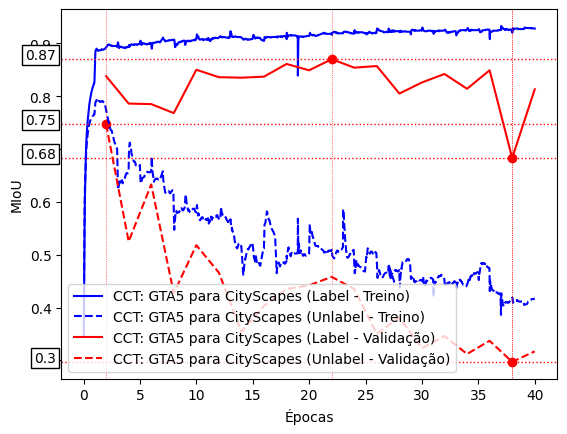

In [48]:
# Carregar os dados dos arquivos CSV
GC_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_S_MIOU.csv')
GC_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_S_MIOU.csv')
GC_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_T_MIOU.csv')
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_T_MIOU.csv')

print(
GC_tre_s['Step'].max(),
GC_tre_t['Step'].max(), 
GC_val_s['Step'].max(), 
GC_val_t['Step'].max())

GC_tre_s['Step'] = GC_tre_s['Step']/(GC_tre_s['Step'].max()/40)
GC_tre_t['Step'] = GC_tre_t['Step']/(GC_tre_t['Step'].max()/40)
GC_val_s['Step'] = GC_val_s['Step']/(GC_val_s['Step'].max()/40)
GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)

plot_metric(GC_tre_s, GC_tre_t, GC_val_s, GC_val_t, labelGC_tre_s, labelGC_tre_t, labelGC_val_s, labelGC_val_t, "Épocas", "MIoU" )

165381 165381 255280 20000


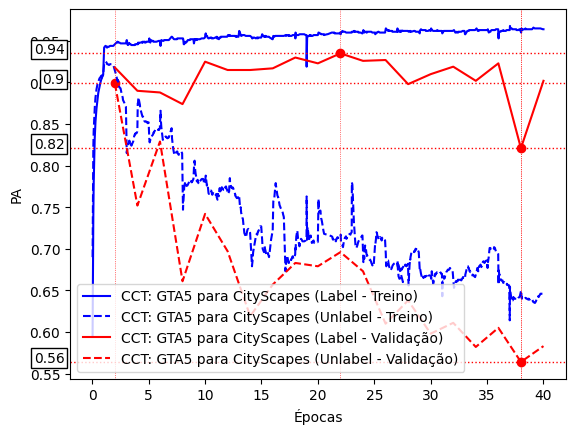

In [49]:
# Carregar os dados dos arquivos CSV
GC_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_S_PA.csv')
GC_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_S_PA.csv')
GC_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_T_PA.csv')
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_T_PA.csv')

print(
GC_tre_s['Step'].max(),
GC_tre_t['Step'].max(), 
GC_val_s['Step'].max(), 
GC_val_t['Step'].max())

GC_tre_s['Step'] = GC_tre_s['Step']/(GC_tre_s['Step'].max()/40)
GC_tre_t['Step'] = GC_tre_t['Step']/(GC_tre_t['Step'].max()/40)
GC_val_s['Step'] = GC_val_s['Step']/(GC_val_s['Step'].max()/40)
GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)

plot_metric(GC_tre_s, GC_tre_t, GC_val_s, GC_val_t, labelGC_tre_s, labelGC_tre_t, labelGC_val_s, labelGC_val_t, "Épocas", "PA" )

165381 165381 255280 20000


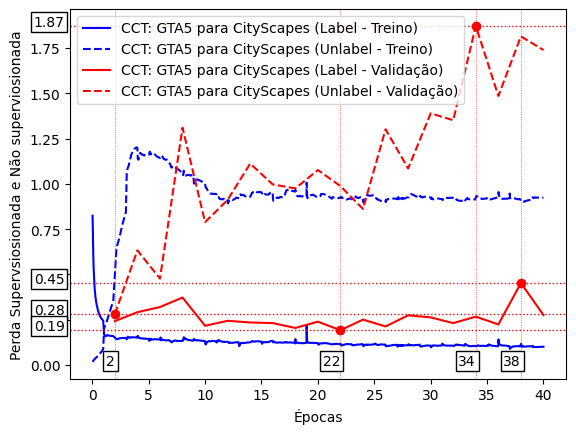

In [50]:
# Carregar os dados dos arquivos CSV
GC_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_S_LS.csv')
GC_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_S_LS.csv')
GC_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_T_LU.csv')
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_T_LU.csv')

print(
GC_tre_s['Step'].max(),
GC_tre_t['Step'].max(), 
GC_val_s['Step'].max(), 
GC_val_t['Step'].max())

GC_tre_s['Step'] = GC_tre_s['Step']/(GC_tre_s['Step'].max()/40)
GC_tre_t['Step'] = GC_tre_t['Step']/(GC_tre_t['Step'].max()/40)
GC_val_s['Step'] = GC_val_s['Step']/(GC_val_s['Step'].max()/40)
GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)

plot_metric(GC_tre_s, GC_tre_t, GC_val_s, GC_val_t, labelGC_tre_s, labelGC_tre_t, labelGC_val_s, labelGC_val_t, "Épocas", "Perda Supervsiosionada e Não superviosionada" )

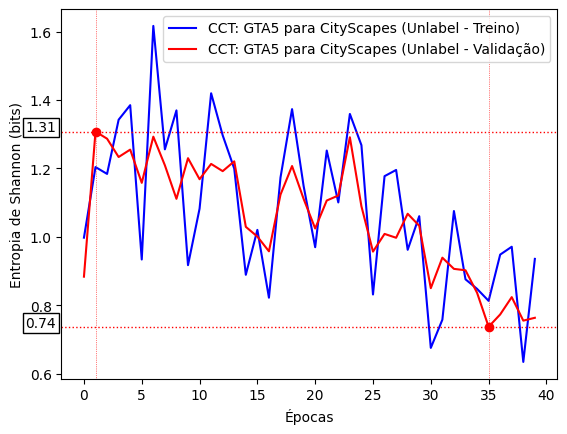

In [51]:
# Carregar os dados dos arquivos CSV
# GC_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_S_SHANNON_CORRIGIDO.csv')
# GC_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_S_SHANNON_CORRIGIDO.csv')
# GC_tre_s['Step'] = GC_tre_s['Step']/(GC_tre_s['Step'].max()/40)
# GC_val_s['Step'] = GC_val_s['Step']/(GC_val_s['Step'].max()/40)
# plot_metric(GC_tre_s,None, GC_val_s,None, labelGC_tre_s,None, labelGC_val_s,None, "Épocas", "Entropia de Shannon (bits)" )


GC_tre_t['Step'] = GC_tre_t['Step']/(GC_tre_t['Step'].max()/40)
GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)
GC_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/T_T_SHANNON_CORRIGIDO.csv')
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_T_SHANNON_CORRIGIDO.csv')
plot_metric(GC_tre_t,None, GC_val_t,None, labelGC_tre_t, None,labelGC_val_t,None, "Épocas", "Entropia de Shannon (bits)" )

#### CCT1: CityScape para CityScapeBrazil

229182 20000


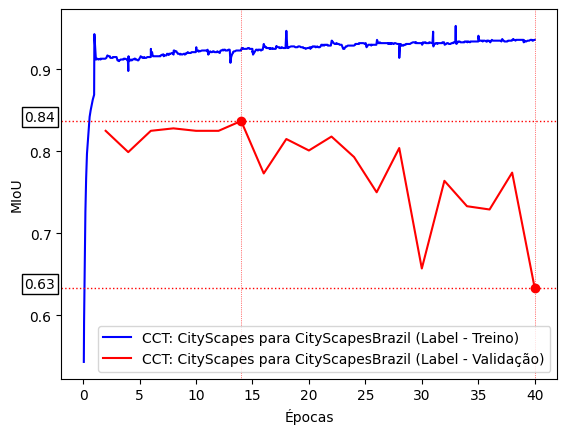

In [52]:
# Carregar os dados dos arquivos CSV
CB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/T_S_MIOU.csv')
CB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_S_MIOU.csv')

print(
CB_tre_s['Step'].max(), 
CB_val_s['Step'].max(),)

CB_tre_s['Step'] = CB_tre_s['Step']/(CB_tre_s['Step'].max()/40)
CB_val_s['Step'] = CB_val_s['Step']/(CB_val_s['Step'].max()/40)

plot_metric(CB_tre_s, None, CB_val_s, None, labelCB_tre_s, None, labelCB_val_s, None, "Épocas", "MIoU" )

229182 20000


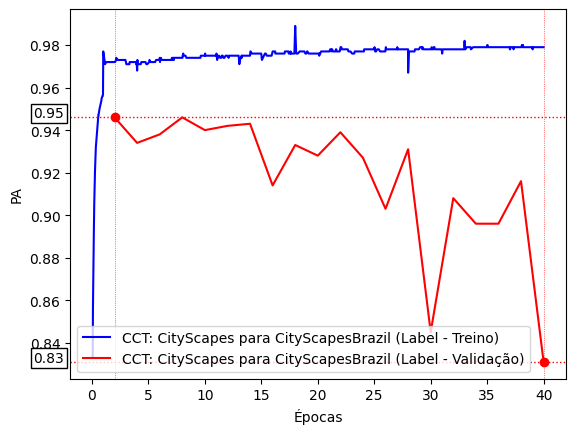

In [53]:
# Carregar os dados dos arquivos CSV
CB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/T_S_PA.csv')
CB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_S_PA.csv')

print(
CB_tre_s['Step'].max(),
CB_val_s['Step'].max())

CB_tre_s['Step'] = CB_tre_s['Step']/(CB_tre_s['Step'].max()/40)
CB_val_s['Step'] = CB_val_s['Step']/(CB_val_s['Step'].max()/40)

plot_metric(CB_tre_s, None, CB_val_s, None, labelCB_tre_s, None, labelCB_val_s, None, "Épocas", "PA" )

229182 20000


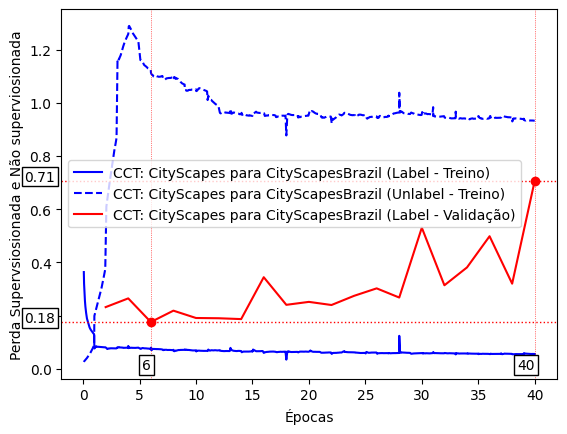

In [54]:
# Carregar os dados dos arquivos CSV
CB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/T_S_LS.csv')
CB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_S_LS.csv')
CB_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/T_T_LU.csv')

print(
CB_tre_s['Step'].max(), 
CB_val_s['Step'].max())

CB_tre_s['Step'] = CB_tre_s['Step']/(CB_tre_s['Step'].max()/40)
CB_val_s['Step'] = CB_val_s['Step']/(CB_val_s['Step'].max()/40)
CB_tre_t['Step'] = CB_tre_t['Step']/(CB_tre_t['Step'].max()/40)

plot_metric(CB_tre_s, CB_tre_t, CB_val_s, None, labelCB_tre_s, labelCB_tre_t, labelCB_val_s, labelCB_val_t, "Épocas", "Perda Supervsiosionada e Não superviosionada" )

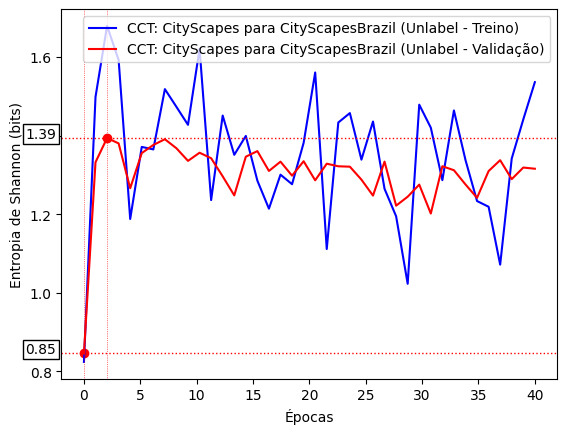

In [55]:
# Carregar os dados dos arquivos CSV
# CB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/T_S_SHANNON_CORRIGIDO.csv')
# CB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_S_SHANNON_CORRIGIDO.csv')
# CB_tre_s['Step'] = CB_tre_s['Step']/(CB_tre_s['Step'].max()/40)
# CB_val_s['Step'] = CB_val_s['Step']/(CB_val_s['Step'].max()/40)
# plot_metric(CB_tre_s, None, CB_val_s, None,labelCB_tre_s, None,labelCB_val_s,None, "Épocas", "Entropia de Shannon (bits)" )

CB_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/T_T_SHANNON_CORRIGIDO.csv')
CB_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_T_SHANNON_CORRIGIDO.csv')
CB_tre_t['Step'] = CB_tre_t['Step']/(CB_tre_t['Step'].max()/40)
CB_val_t['Step'] = CB_val_t['Step']/(CB_val_t['Step'].max()/40)
plot_metric(CB_tre_t, None,CB_val_t, None,labelCB_tre_t, None,labelCB_val_t,None, "Épocas", "Entropia de Shannon (bits)" )

#### CTTAD: GTA5 para CityScape e CityScapeBrazil

In [56]:
label_tre_s1 = "CCTMD: GTA5 para CityScapes e CityScapesBrazil (Label D1 - Treino)"
label_val_s1 = "CCTMD: GTA5 para CityScapes e CityScapesBrazil (Label D1 - Validação)"
label_tre_s2 = "CCTMD: GTA5 para CityScapes e CityScapesBrazil (Label D2 - Treino)"
label_val_s2 = "CCTMD: GTA5 para CityScapes e CityScapesBrazil (Label D2 - Validação)"
label_tre_t2 = "CCTMD: GTA5 para CityScapes e CityScapesBrazil (Unlabel D2 - Treino)"
label_val_t2 = "CCTMD: GTA5 para CityScapes e CityScapesBrazil (Unlabel D2 - Validação)"

229182 255280 229182 20500


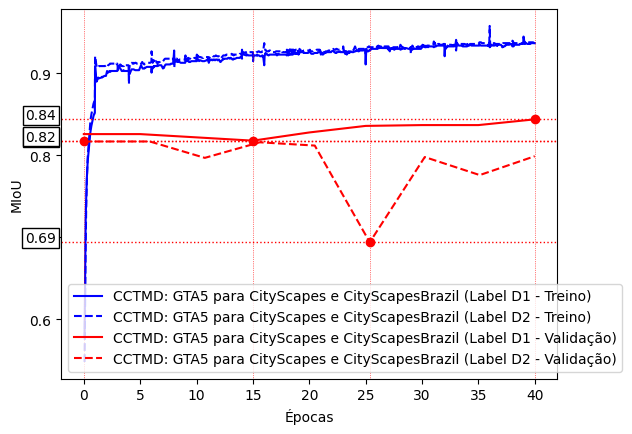

In [57]:
# Carregar os dados dos arquivos CSV
tre_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S1_MIOU.csv')
val_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S1_MIOU.csv')
tre_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S2_MIOU.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S2_MIOU.csv')

print(
tre_s1['Step'].max(),
val_s1['Step'].max(), 
tre_s2['Step'].max(), 
val_s2['Step'].max())

tre_s1['Step'] = tre_s1['Step']/(tre_s1['Step'].max()/40)
val_s1['Step'] = val_s1['Step']/(val_s1['Step'].max()/40)
tre_s2['Step'] = tre_s2['Step']/(tre_s2['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)

plot_metric(tre_s1,tre_s2, val_s1, val_s2, label_tre_s1, label_tre_s2, label_val_s1, label_val_s2, "Épocas", "MIoU" )

229182 255280 229182 20500


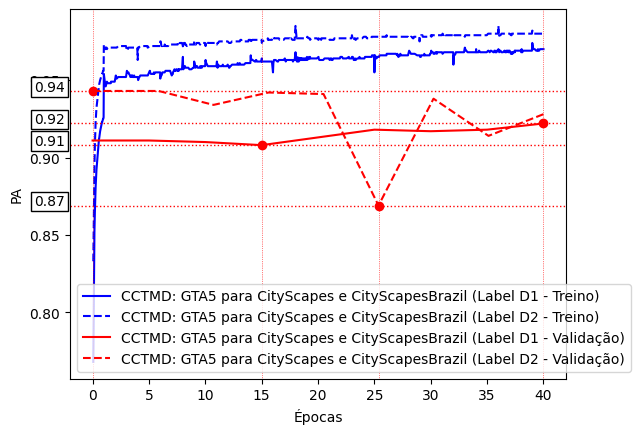

In [58]:
# Carregar os dados dos arquivos CSV
tre_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S1_PA.csv')
val_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S1_PA.csv')
tre_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S2_PA.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S2_PA.csv')

print(
tre_s1['Step'].max(),
val_s1['Step'].max(), 
tre_s2['Step'].max(), 
val_s2['Step'].max())

tre_s1['Step'] = tre_s1['Step']/(tre_s1['Step'].max()/40)
val_s1['Step'] = val_s1['Step']/(val_s1['Step'].max()/40)
tre_s2['Step'] = tre_s2['Step']/(tre_s2['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)

plot_metric(tre_s1,tre_s2, val_s1, val_s2, label_tre_s1, label_tre_s2, label_val_s1, label_val_s2, "Épocas", "PA" )

229182 255280 229182 20500


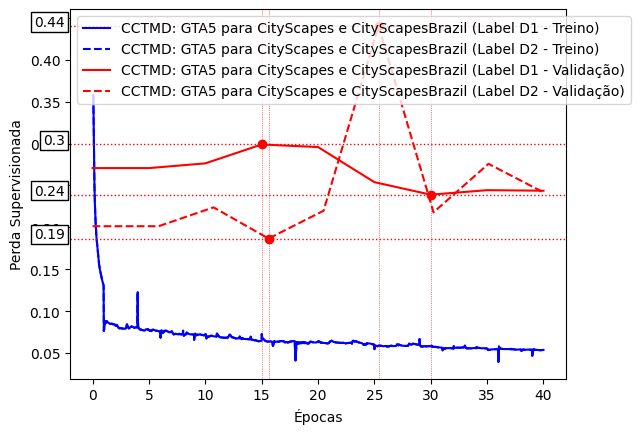

In [59]:
# Carregar os dados dos arquivos CSV
tre_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S1_LS.csv')
val_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S1_LS.csv')
tre_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S2_LS.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S2_LS.csv')

print(
tre_s1['Step'].max(),
val_s1['Step'].max(), 
tre_s2['Step'].max(), 
val_s2['Step'].max())

tre_s1['Step'] = tre_s1['Step']/(tre_s1['Step'].max()/40)
val_s1['Step'] = val_s1['Step']/(val_s1['Step'].max()/40)
tre_s2['Step'] = tre_s2['Step']/(tre_s2['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)

plot_metric(tre_s1,tre_s2, val_s1, val_s2, label_tre_s1, label_tre_s2, label_val_s1, label_val_s2, "Épocas", "Perda Supervisionada" )

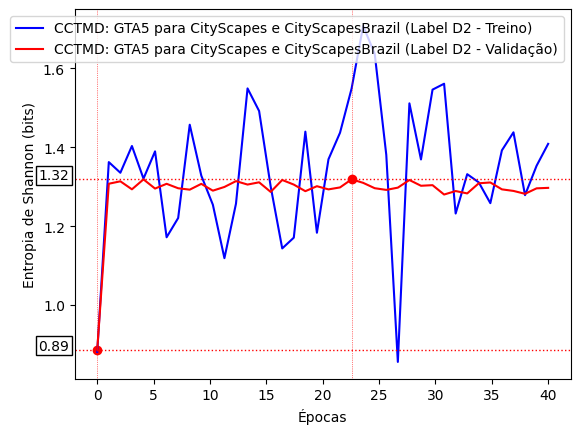

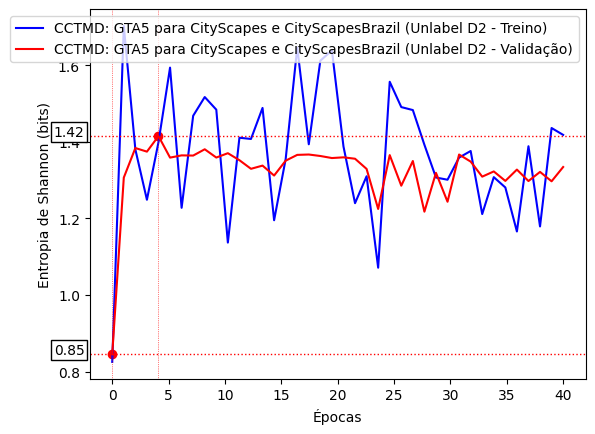

In [60]:
# Carregar os dados dos arquivos CSV
# tre_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S1_SHANNON_CORRIGIDO.csv')
# val_s1 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S1_SHANNON_CORRIGIDO.csv')
# tre_s1['Step'] = tre_s1['Step']/(tre_s1['Step'].max()/40)
# val_s1['Step'] = val_s1['Step']/(val_s1['Step'].max()/40)
# plot_metric(tre_s1, None, val_s1, None,  label_tre_s1, None,  label_val_s1, None,  "Épocas", "Entropia de Shannon (bits)" )


tre_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_S2_SHANNON_CORRIGIDO.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S2_SHANNON_CORRIGIDO.csv')
tre_t2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_T2_SHANNON_CORRIGIDO.csv')
val_t2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_T2_SHANNON_CORRIGIDO.csv')
tre_s2['Step'] = tre_s2['Step']/(tre_s2['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)
tre_t2['Step'] = tre_t2['Step']/(tre_t2['Step'].max()/40)
val_t2['Step'] = val_t2['Step']/(val_t2['Step'].max()/40)
plot_metric(tre_s2, None,  val_s2, None,  label_tre_s2,  None, label_val_s2,  None, "Épocas", "Entropia de Shannon (bits)" )
plot_metric(tre_t2,  None, val_t2, None,  label_tre_t2,  None, label_val_t2,  None, "Épocas", "Entropia de Shannon (bits)" )

#### CCT1: GTA5 para CityScapeBrazil

229190 255280


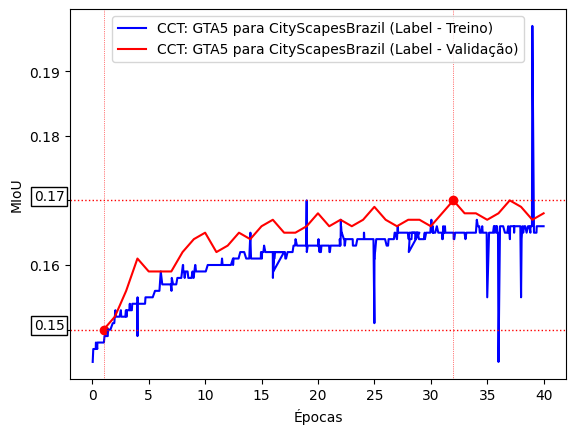

In [61]:
# Carregar os dados dos arquivos CSV
GB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/T_S_MIOU.csv')
GB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_S_MIOU.csv')

print(
GB_tre_s['Step'].max(), 
GB_val_s['Step'].max(),)

GB_tre_s['Step'] = GB_tre_s['Step']/(GB_tre_s['Step'].max()/40)
GB_val_s['Step'] = GB_val_s['Step']/(GB_val_s['Step'].max()/40)

plot_metric(GB_tre_s, None, GB_val_s, None, labelGB_tre_s, None, labelGB_val_s, None, "Épocas", "MIoU" )

229190 255280


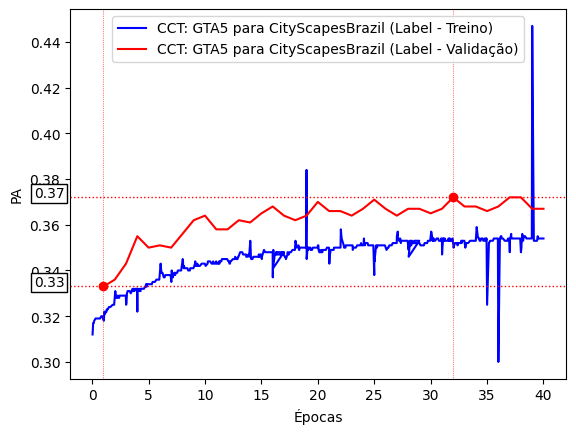

In [62]:
# Carregar os dados dos arquivos CSV
GB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/T_S_PA.csv')
GB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_S_PA.csv')

print(
GB_tre_s['Step'].max(),
GB_val_s['Step'].max())

GB_tre_s['Step'] = GB_tre_s['Step']/(GB_tre_s['Step'].max()/40)
GB_val_s['Step'] = GB_val_s['Step']/(GB_val_s['Step'].max()/40)

plot_metric(GB_tre_s, None, GB_val_s, None, labelGB_tre_s, labelGB_tre_t, labelGB_val_s, labelGB_val_t, "Épocas", "PA" )

229190 255280


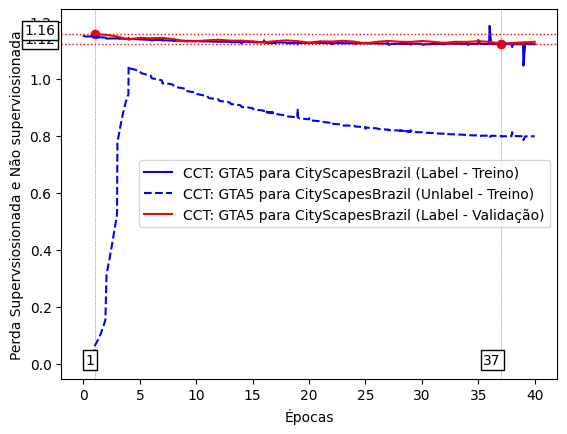

In [63]:
# Carregar os dados dos arquivos CSV
GB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/T_S_LS.csv')
GB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_S_LS.csv')
GB_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/T_T_LU.csv')

print(
GB_tre_s['Step'].max(), 
GB_val_s['Step'].max())

GB_tre_s['Step'] = GB_tre_s['Step']/(GB_tre_s['Step'].max()/40)
GB_val_s['Step'] = GB_val_s['Step']/(GB_val_s['Step'].max()/40)
GB_tre_t['Step'] = GB_tre_t['Step']/(GB_tre_t['Step'].max()/40)

plot_metric(GB_tre_s, GB_tre_t, GB_val_s, None, labelGB_tre_s, labelGB_tre_t, labelGB_val_s, labelGB_val_t, "Épocas", "Perda Supervsiosionada e Não superviosionada" )

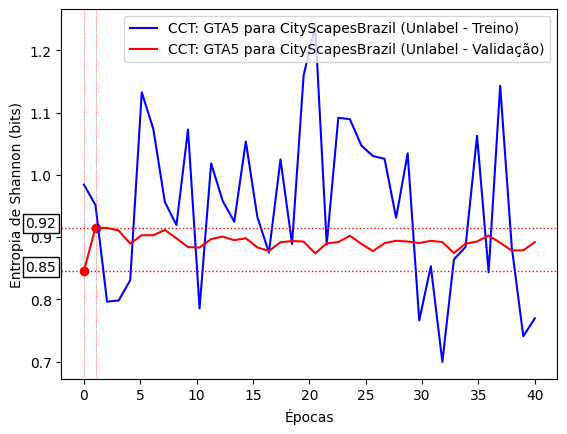

In [64]:
# Carregar os dados dos arquivos CSV
# GB_tre_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/T_S_SHANNON_CORRIGIDO.csv')
# GB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_S_SHANNON_CORRIGIDO.csv')
# GB_tre_s['Step'] = GB_tre_s['Step']/(GB_tre_s['Step'].max()/40)
# GB_val_s['Step'] = GB_val_s['Step']/(GB_val_s['Step'].max()/40)
# plot_metric(GB_tre_s, None, GB_val_s, None, labelGB_tre_s, None, labelGB_val_s, None, "Épocas", "Entropia de Shannon (bits)" )

GB_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/T_T_SHANNON_CORRIGIDO.csv')
GB_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_T_SHANNON_CORRIGIDO.csv')
GB_tre_t['Step'] = GB_tre_t['Step']/(GB_tre_t['Step'].max()/40)
GB_val_t['Step'] = GB_val_t['Step']/(GB_val_t['Step'].max()/40)
plot_metric(GB_tre_t, None, GB_val_t, None, labelGB_tre_t, None, labelGB_val_t, None, "Épocas", "Entropia de Shannon (bits)" )






### Comparações

In [65]:
def plot_metric_comp(data1, data2, data3, data4, label1, label2,label3, label4, eixox, eixoy):
    # Criar a figura e os eixos
    fig, ax = plt.subplots()

    if data1 is not  None:
        # Plotar o primeiro conjunto de dados
        ax.plot(data1['Step'], data1['Value'], color='g', label=label1)

    if data2 is not  None:
        # Plotar o segundo conjunto de dados no mesmo eixo Y
        ax.plot(data2['Step'], data2['Value'], color='purple', label=label2)

    if data3 is not  None:
        # Plotar o primeiro conjunto de dados
        ax.plot(data3['Step'], data3['Value'], color='y', label=label3)

    if data4 is not  None:
        # Plotar o segundo conjunto de dados no mesmo eixo Y
        ax.plot(data4['Step'], data4['Value'], color='d', label=label4)



    # Configurar os rótulos dos eixos
    ax.set_xlabel(eixox)
    ax.set_ylabel(eixoy)

    # Adicionar legendas
    ax.legend()

    # Mostrar o gráfico
    plt.show()

In [66]:
labelGC_val_t = "CCT: CityScapes (Não superv. - Validação)"
labelCB_val_s = "CCT: CityScapes (Superv. - Validação)"
labelval_s2   = "CCTMD: CityScapes (Superv. - Validação)"

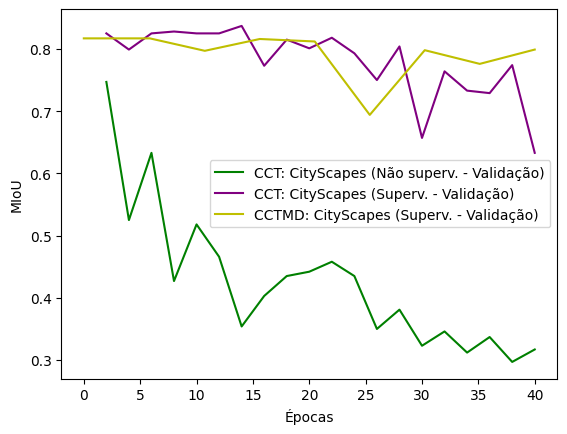

In [67]:
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_T_MIOU.csv')
CB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_S_MIOU.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S2_MIOU.csv')


GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)
CB_val_s['Step'] = CB_val_s['Step']/(CB_val_s['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)

plot_metric_comp(GC_val_t, CB_val_s, val_s2, None, labelGC_val_t, labelCB_val_s, labelval_s2, None, "Épocas", "MIoU" )

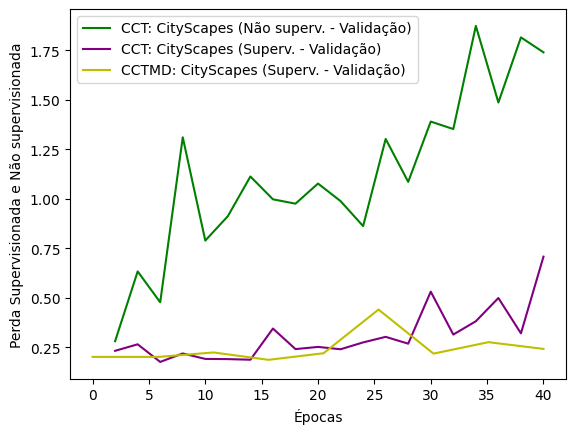

In [68]:
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_T_LU.csv')
CB_val_s = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_S_LS.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S2_LS.csv')

GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)
CB_val_s['Step'] = CB_val_s['Step']/(CB_val_s['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)

plot_metric_comp(GC_val_t, CB_val_s, val_s2, None, labelGC_val_t, labelCB_val_s, labelval_s2, None, "Épocas", "Perda Supervisionada e Não supervisionada" )

In [69]:
labelGC_val_t = "CCT: GTA5 para CityScapes (Superv. - Validação)"
labelGB_val_t = "CCT: GTA5 para CityScapesBrazil (Superv. - Validação)"
labelval_s2   = "CCTMD: GTA5 (Superv. - Validação)"

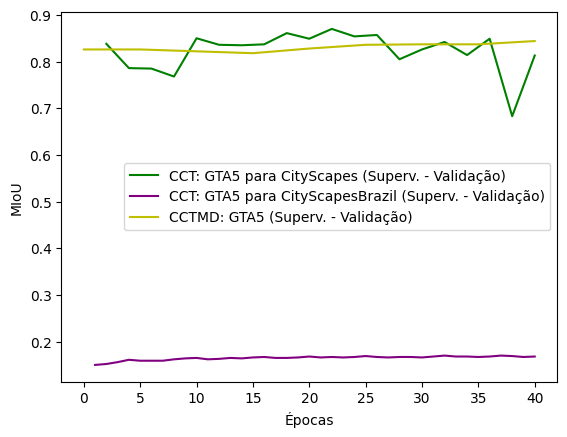

In [70]:
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_S_MIOU.csv')
GB_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_S_MIOU.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S1_MIOU.csv')

GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)
GB_val_t['Step'] = GB_val_t['Step']/(GB_val_t['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)

plot_metric_comp(GC_val_t, GB_val_t, val_s2, None, labelGC_val_t, labelGB_val_t, labelval_s2, None, "Épocas", "MIoU" )

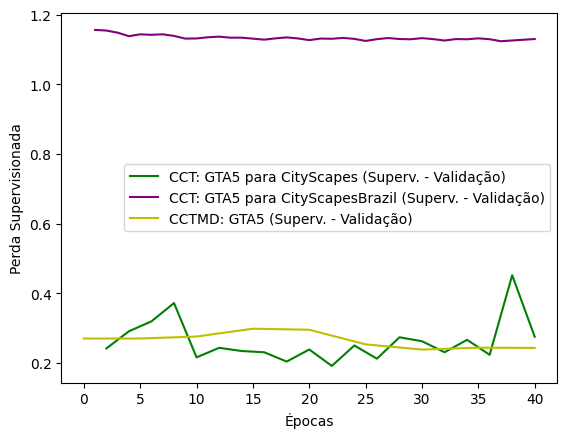

In [71]:
GC_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GC/V_S_LS.csv')
GB_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_S_LS.csv')
val_s2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_S1_LS.csv')

GC_val_t['Step'] = GC_val_t['Step']/(GC_val_t['Step'].max()/40)
GB_val_t['Step'] = GB_val_t['Step']/(GB_val_t['Step'].max()/40)
val_s2['Step'] = val_s2['Step']/(val_s2['Step'].max()/40)

plot_metric_comp(GC_val_t, GB_val_t, val_s2, None, labelGC_val_t, labelGB_val_t, labelval_s2, None, "Épocas", "Perda Supervisionada" )

In [72]:
labelGB_val_t = "CCT: CityScapesBrazil de GTA5 (Não Superv. - Validação)"
labelCB_val_t = "CCT: CityScapesBrazil de CityScapes (Não Superv. - Validação)"
labelval_t2   = "CCTMD: CityScapesBrazil (Não Superv. - Validação)"

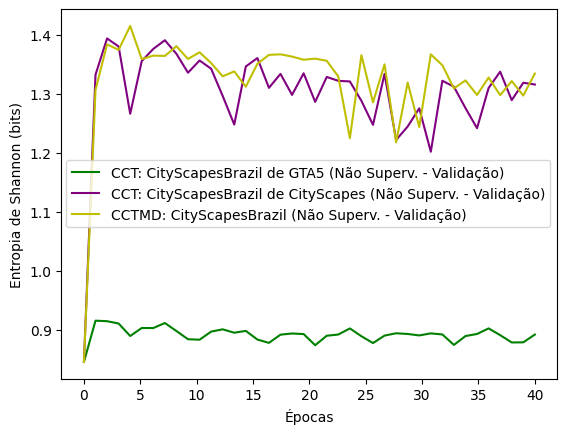

In [73]:
CB_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/V_T_SHANNON_CORRIGIDO.csv')
GB_val_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/V_T_SHANNON_CORRIGIDO.csv')
val_t2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/V_T2_SHANNON_CORRIGIDO.csv')

CB_val_t['Step'] = CB_val_t['Step']/(CB_val_t['Step'].max()/40)
GB_val_t['Step'] = GB_val_t['Step']/(GB_val_t['Step'].max()/40)
val_t2['Step'] = val_t2['Step']/(val_t2['Step'].max()/40)

plot_metric_comp(GB_val_t, CB_val_t, val_t2, None, labelGB_val_t, labelCB_val_t, labelval_t2, None, "Épocas", "Entropia de Shannon (bits)" )

In [74]:
labelGB_tre_t = "CCT: CityScapesBrazil de GTA5 (Não Superv. - Treino)"
labelCB_tre_t = "CCT: CityScapesBrazil de CityScapes (Não Superv. - Treino)"
labeltre_t2   = "CCTMD: CityScapesBrazil (Não Superv. - Treino)"

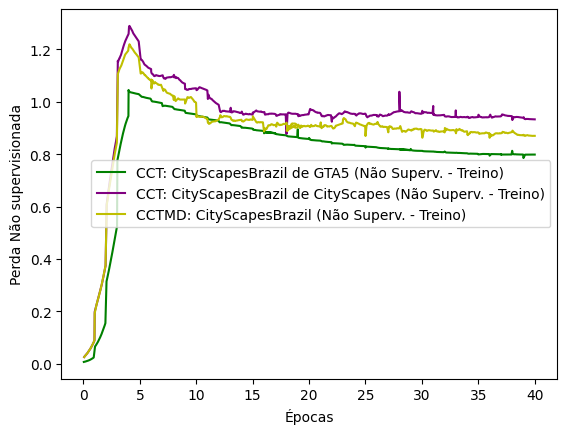

In [75]:
CB_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_CB/T_T_LU.csv')
GB_tre_t = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1_GB/T_T_LU.csv')
tre_t2 = pd.read_csv('C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Metrics/Dados/CCT/CCT_V1/T_T2_LU.csv')

CB_tre_t['Step'] = CB_tre_t['Step']/(CB_tre_t['Step'].max()/40)
GB_tre_t['Step'] = GB_tre_t['Step']/(GB_tre_t['Step'].max()/40)
tre_t2['Step'] = tre_t2['Step']/(tre_t2['Step'].max()/40)

plot_metric_comp(GB_tre_t, CB_tre_t, tre_t2, None, labelGB_tre_t, labelCB_tre_t, labeltre_t2, None, "Épocas", "Perda Não supervisionada" )

## Avaliação do CityScapesBrazil

In [40]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

# Definindo o número de imagens
n_imagens = 2000
linhas = 50
colunas = 41

def plot_grid_pred_brazil(path, base):

    list_eval = [
        "RioGrandeDoSul_18229",
        "RioGrandeDoSul_18798",
        "RioGrandeDoSul_18072",
        "RioGrandeDoSul_18357",
        "RioGrandeDoSul_18723",
        "RioGrandeDoSul_17643",
        "RioGrandeDoSul_19260",
        "RioGrandeDoSul_19290",
        "RioGrandeDoSul_19304",
        "RioGrandeDoSul_18844",
        "Fortaleza_18268",
        "Fortaleza_18106",
        "Fortaleza_18763",
        "Fortaleza_19161",
        "Fortaleza_17622",
        "Fortaleza_18075",
        "Fortaleza_19018",
        "Fortaleza_19284",
        "Fortaleza_18873",
        "Fortaleza_18870",
        "RiodeJaneiro_18543",
        "RiodeJaneiro_17290",
        "RiodeJaneiro_18731",
        "RiodeJaneiro_19074",
        "RiodeJaneiro_18542",
        "RiodeJaneiro_19257",
        "RiodeJaneiro_18419",
        "RiodeJaneiro_19245",
        "RiodeJaneiro_18239",
        "RiodeJaneiro_18820",
        "RodoviasNordesteSul_18984",
        "RodoviasNordesteSul_17192",
        "RodoviasNordesteSul_17193",
        "RodoviasNordesteSul_17214",
        "RodoviasNordesteSul_18792",
        "RodoviasNordesteSul_18793",
        "RodoviasNordesteSul_19222",
        "RodoviasNordesteSul_19217",
        "RodoviasNordesteSul_18298",
        "RodoviasNordesteSul_19098",
        "SaoPaulo_17195",
        "SaoPaulo_17314",
        "SaoPaulo_18905",
        "SaoPaulo_19206",
        "SaoPaulo_17937",
        "SaoPaulo_19323",
        "SaoPaulo_19039",
        "SaoPaulo_19271",
        "SaoPaulo_18726",
        "SaoPaulo_18657"
    ]

    # Criando uma figura com um grid de subplots
    fig, axs = plt.subplots(linhas, colunas, figsize=(184, 256))

    # Gerando e plotando as imagens
    for j in range(colunas):
        for i in range(linhas):
        
            idx = i * colunas + j  # Índice da imagem
            if j == 0:
                mask = Image.open(path+f"image/"+list_eval[i]+".jpg").convert("RGB")  # Imagem 10x10, você pode ajustar o tamanho
            else:
                # Criando uma imagem aleatória
                mask = Image.open(path+f"mask/{str(j-1)}_"+list_eval[i]+".png")  # Imagem 10x10, você pode ajustar o tamanho
            axs[i, j].imshow(mask)
            axs[i, j].axis('off')  # Desligar os eixos

    # Ajustando o layout
    plt.tight_layout()
    plt.savefig("Dados/CCT/"+f'output_{base}.png', dpi=100) 

In [ ]:
plot_grid_pred_brazil("C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Inference/output/CCT/brazil/eval_CB/", "CB")

In [ ]:
plot_grid_pred_brazil("C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Inference/output/CCT/brazil/eval_GB/", "GB")

In [ ]:
plot_grid_pred_brazil("C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Inference/output/CCT/brazil/eval_GC/", "GC")

In [ ]:
plot_grid_pred_brazil("C:/Users/will_/OneDrive/Documentos/GitHub/Light_Domain_Adaptation/experimento/Inference/output/CCT/brazil/eval_GCB/", "GCB")